# Objective
1. train a model for MNIST dataset
2. train a model for CIFAR10 dataset

# MNIST

In [41]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [42]:
import numpy as np
from numpy.random import seed
seed(42)
import tensorflow as tf


from tensorflow.keras.layers import Dense,Input, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [43]:
#define epoch, batch size and num_class
nb_epochs = 100
batch_size = 32
nb_classes = 10

In [44]:
#load data

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [45]:
#define class name
class_name = {
  0,1,2,3,4,5,6,7,8,9
}

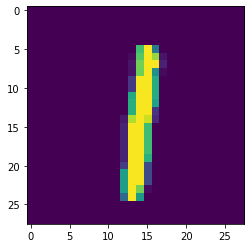

In [46]:
#visual data
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    #plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        #plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
draw_img(40)

In [47]:
#find image shape
x_train[1].shape

(28, 28)

In [48]:
#building neuron network

input = Input(shape = (28,28,1))
x=Conv2D(16, (3,3), activation='relu', padding='same')(input)
x=Conv2D(16, (3,3), activation='relu', padding='same')(x)
x=MaxPooling2D((2,2), strides=(2,2))(x)

x=Conv2D(32, (3,3), activation='relu', padding='same')(x)
x=Conv2D(32, (3,3), activation='relu', padding='same')(x)
x=MaxPooling2D((2,2), strides=(2,2))(x)

x=Conv2D(64, (3,3), activation='relu', padding='same')(x)
x=Conv2D(64, (3,3), activation='relu', padding='same')(x)
x=Conv2D(64, (3,3), activation='relu', padding='same')(x)
x=MaxPooling2D((2,2), strides=(2,2))(x)

x=Conv2D(128, (3,3), activation='relu', padding='same')(x)
x=Conv2D(128, (3,3), activation='relu', padding='same')(x)
x=Conv2D(128, (3,3), activation='relu', padding='same')(x)
x=MaxPooling2D((2,2), strides=(2,2))(x)

x=Flatten()(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

model_3 = Model(inputs = input, outputs = prediction)
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [49]:
#train a model

h = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2031 - accuracy: 0.9342 - val_loss: 0.0661 - val_accuracy: 0.9809
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9822 - val_loss: 0.0487 - val_accuracy: 0.9866
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.0687 - val_accuracy: 0.9847
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0423 - accuracy: 0.9886 - val_loss: 0.0476 - val_accuracy: 0.9886
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0370 - accuracy: 0.9903 - val_loss: 0.0325 - val_accuracy: 0.9918
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9917 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.9920 - val_loss: 0.0305 - val_ac

In [50]:
#train evaluation
loss, accuracy = model_3.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 1.000000  ;  loss = 0.000017


In [51]:
#test evaluation
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.994000  ;  loss = 0.073748


# CIFAR10

In [61]:
#define epoch, batch size and num_classes
nb_epochs = 100
batch_size = 32
nb_classes = 10

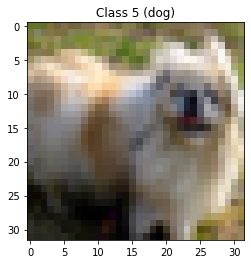

In [62]:
#define class name

class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

#load data
cifar = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

#show image
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
draw_img(40)

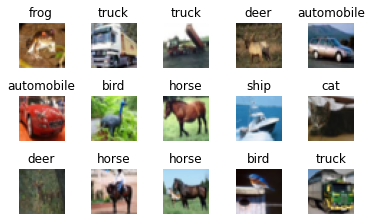

In [63]:
draw_sample(x_train, y_train, 0, 3, 5)

In [64]:
#image size
x_train[1].shape

(32, 32, 3)

In [83]:
#building neuron network

input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.16)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.18)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.20)(x)
x = Dense(128, activation = 'relu')(x)

prediction = Dense(10, activation='softmax')(x)
model_2 = Model(inputs = input, outputs = prediction)

In [84]:
#eary stopping
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-10)
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
#train a model

h_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9875 - accuracy: 0.2635 - val_loss: 1.8233 - val_accuracy: 0.3265
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8470 - accuracy: 0.3263 - val_loss: 1.7722 - val_accuracy: 0.3717
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8038 - accuracy: 0.3400 - val_loss: 1.7131 - val_accuracy: 0.3849
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7732 - accuracy: 0.3540 - val_loss: 1.6921 - val_accuracy: 0.3877
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7434 - accuracy: 0.3692 - val_loss: 1.6500 - val_accuracy: 0.4176
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7275 - accuracy: 0.3748 - val_loss: 1.6618 - val_accuracy: 0.4176
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7088 - accuracy: 0.3817 - val_loss: 1.6198 - val_ac

In [86]:
#train evaluation
loss, accuracy = model_2.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.495400  ;  loss = 1.437432


In [87]:
#test evaluation
loss, accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.466500  ;  loss = 1.525436
